In [1]:
#Ensemble des import utiles pour l'execution du notebook
import statsTuxML
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


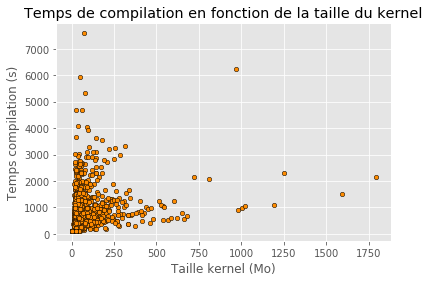

Coefficient de correlation : 0.20313904449223852


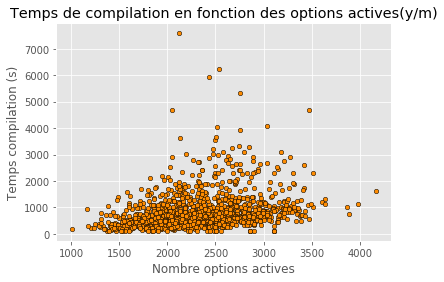

Coefficient de correlation : 0.29824861130931823


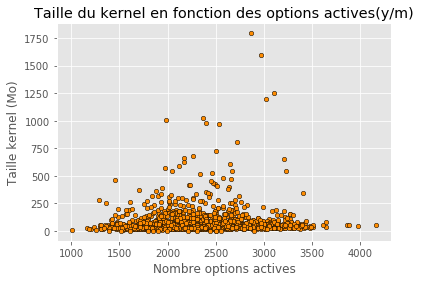

Coefficient de correlation : 0.0699704644388055


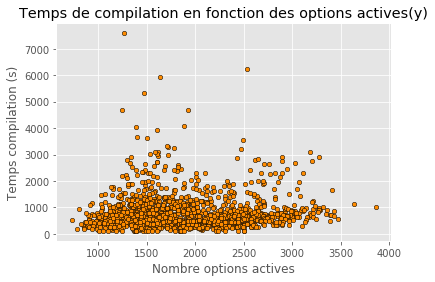

Coefficient de correlation : 0.058019216093818896


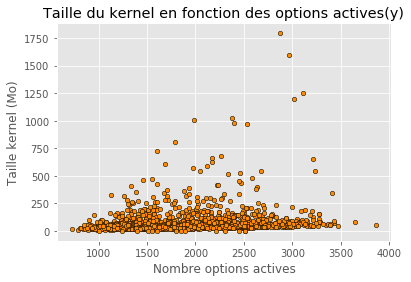

Coefficient de correlation : 0.203295444633852


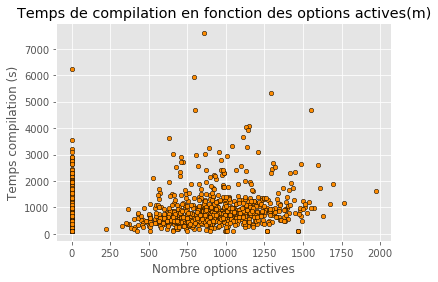

Coefficient de correlation : 0.20632846056336587


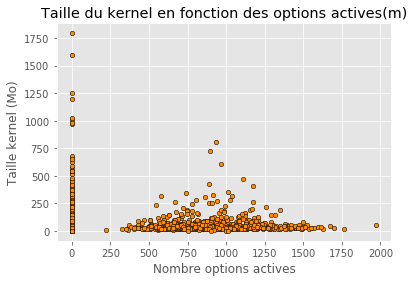

Coefficient de correlation : -0.17248930068710921

Nombre de compilation 1674
Informations sur les options activées en module {'Min': 0, 'Mean': 452.9169653524492, 'Max': 1972, 'Total': 758183}
Informations sur les options activées en dur {'Min': 724, 'Mean': 1861.400836320191, 'Max': 3864, 'Total': 3115985}
Informations sur les options activées en tout {'Min': 1005, 'Mean': 2314.3178016726406, 'Max': 4167, 'Total': 3874168}
Informations sur la taille du kernel {'Min': 0.0, 'Mean': 73.04650729417516, 'Max': 1792.972885131836, 'Total': 122279.85321044922}
Informations sur le temps de compilation {'Min': 108.521, 'Mean': 781.7382323775388, 'Max': 7588.32, 'Total': 1308629.801}


In [2]:
statistiques = statsTuxML.stats("set5.csv")
nbComp, stats_module, stats_yes, stats_combine, stats_size, stats_time  = statistiques

print("")
print("Nombre de compilation", nbComp)
print("Informations sur les options activées en module", stats_module)
print("Informations sur les options activées en dur", stats_yes)
print("Informations sur les options activées en tout", stats_combine)
print("Informations sur la taille du kernel", stats_size)
print("Informations sur le temps de compilation", stats_time)



In [3]:
#Extraction des données du CSV

dataBrut = [] #Toutes les infos sans temps de compilation et taille du kernel
info = [] #Temps de compilation et taille du kernel

infoTime = []
infoSize =[]

with open("set5.csv") as csvFile :
    reader = csv.DictReader(csvFile)
    for ligne in reader :
        size = int(ligne["KERNEL_SIZE"]) / (2**20)
        comp = float(ligne["COMPILE_TIME"])
        infoTime.append(comp)
        infoSize.append(size)
        info.append([size,comp])
        tmp = {}
        for i in ligne :
            if i !="KERNEL_SIZE" and i !="COMPILE_TIME" and i != "":
                tmp[i] = ligne[i]
        dataBrut.append(tmp)


In [4]:
#Preprocessing des data
v = DictVectorizer(sparse=False)
dataPreProcess = v.fit_transform(dataBrut)
#v.get_feature_names()


In [5]:
#Separation du training set et du testing set
#data_train, data_test, info_train, info_test = train_test_split(dataPreProcess, info, test_size=0.2, random_state=0)

data_train, data_test, infoSize_train, infoSize_test = train_test_split(dataPreProcess, infoSize, test_size=0.2, random_state=0)



In [6]:
# Decision Tree

# Apprentissage du model
regr_1 = DecisionTreeRegressor(max_depth=10)
regr_2 = DecisionTreeRegressor() #Pas de profondeur max
regr_1.fit(data_train, infoSize_train)
regr_2.fit(data_train, infoSize_train)

# Prediction
info_predict_1 = regr_1.predict(data_test)
info_predict_2 = regr_2.predict(data_test)

# Calcul des erreurs
absErr_1 = mean_absolute_error(infoSize_test, info_predict_1)
absErr_2 = mean_absolute_error(infoSize_test, info_predict_2)

sqrtErr_1 = mean_squared_error(infoSize_test, info_predict_1)
sqrtErr_2 = mean_squared_error(infoSize_test, info_predict_2)

r2Score_1 = r2_score(infoSize_test, info_predict_1)
r2Score_2 = r2_score(infoSize_test, info_predict_2)

#Affichage des marges d'erreurs
print("Valeur faible = Meilleur prédiction")
print("Moyenne absolue des erreurs : arbre 1 :", absErr_1, "; arbre 2 :", absErr_2)
print("Moyenne au carré des erreurs : arbre 1 :", sqrtErr_1, "; arbre 2 :", sqrtErr_2)
print("")
print("Valeur proche de 1 = Meilleur prédiction")
print("Score r² : arbre 1 :", r2Score_1, "; arbre 2 :", r2Score_2)


Valeur faible = Meilleur prédiction
Moyenne absolue des erreurs : arbre 1 : 31.490656179923295 ; arbre 2 : 30.10732758934818
Moyenne au carré des erreurs : arbre 1 : 5503.01062640215 ; arbre 2 : 4614.788356928162

Valeur proche de 1 = Meilleur prédiction
Score r² : arbre 1 : 0.24135068424871287 ; arbre 2 : 0.36380169565300235


In [7]:
print(regr_1.get_params())
print(regr_2.get_params())

{'min_samples_split': 2, 'criterion': 'mse', 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 10, 'min_impurity_split': None, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'splitter': 'best', 'random_state': None, 'presort': False}
{'min_samples_split': 2, 'criterion': 'mse', 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': None, 'min_impurity_split': None, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'splitter': 'best', 'random_state': None, 'presort': False}


In [10]:
#Random Forest Decision Tree

# Apprentissage du model (Profondeur limitée)
forest1 = RandomForestRegressor(max_depth=20, random_state=0)
forest1.fit(data_train, infoSize_train)

# Prediction
info_predict_3 = forest1.predict(data_test)

# Calcul des erreurs
absErr_3 = mean_absolute_error(infoSize_test, info_predict_3)

print(absErr_3)

29.283977755112097


In [11]:
#Random Forest Decision Tree

# Apprentissage du model (Pas de profondeur max)
forest2 = RandomForestRegressor(max_depth=None, random_state=0)
forest2.fit(data_train, infoSize_train)

# Prediction
info_predict_4 = forest2.predict(data_test)

# Calcul des erreurs
absErr_4 = mean_absolute_error(infoSize_test, info_predict_4)

print(absErr_4)

29.340899077458168
